In [12]:
import pandas as pd
import urllib.parse
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:


df = pd.read_csv('properties_data.csv')
df = df.drop_duplicates(subset='id')
df = df.drop(df[df["Type"].isin(["house group", "apartment group"])].index)

duplicate_columns = df.columns[df.columns.duplicated()]
df = df.loc[:, ~df.columns.duplicated()]

filtered_columns = ["id","location","Zip","Type","Subtype",
    "Price","Transaction Type","Bedrooms","Living area","Kitchen type",
    "Furnished","How many fireplaces?","Terrace","Terrace surface",
    "Garden","Garden surface","Surface of the plot","Number of frontages",
    "Swimming pool","Building condition","Primary energy consumption"]
df = df[filtered_columns]

df = df.rename(columns={
    'location' :'Locality',
    'Transaction Type' : 'Type of sale',
    'Type' :'Type of property',
    'Subtype' : 'Subtype of property',
    'Number of frontages': 'Number of facades',
    'Bedrooms':'Number of rooms',
    'Surface of the plot' :'Surface of the land',
    'Kitchen type' : 'Fully equipped kitchen',
    'How many fireplaces?' : 'Open fire'
})

#put the columns in a specific order
df = df.reindex(columns=['id', 'Locality',"Zip", 'Type of property', 'Subtype of property',
                         'Type of sale', 'Price', 'Number of facades', 'Number of rooms', 
                         'Living area', 'Fully equipped kitchen', 'Furnished','Primary energy consumption',
                         'Surface of the land', 'Terrace', 'Terrace surface',
                         'Garden','Garden surface', 'Open fire', 
                         'Swimming pool'])

def clean_and_convert(column):
    column = column.apply(lambda x: re.sub('\D+', '', str(x)))
    column = column.replace('', np.nan).fillna(0).astype(int)
    return column

df['Locality'] = df['Locality'].apply(urllib.parse.unquote)

df['Living area'] = clean_and_convert(df['Living area'])
df['Terrace'] = clean_and_convert(df['Terrace'])
df['Garden'] = clean_and_convert(df['Garden'])
df['Surface of the land'] = clean_and_convert(df['Surface of the land'])

df.to_csv('properties_clean.csv', index=False)


/tmp/ipykernel_1948/1991374932.py:1: DtypeWarning: Columns (41,42,43,44,90,91,92,93,113,115) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('properties_data.csv')


df.describe()

In [49]:
df.describe()

,id,Zip,Number of facades,Number of rooms,Living area,Surface of the land,Terrace,Garden,Open fire
count,1.866300e+04,18663.000000,14235.000000,18316.000000,18663.000000,18663.000000,18663.0,18663.0,1013.000000
mean,1.042080e+07,4789.945775,2.765508,3.029646,179.471093,697.502384,0.0,0.0,1.061204
std,2.310011e+05,3166.567583,0.922045,1.657928,1297.974308,5669.115053,0.0,0.0,0.414897
min,7.710166e+06,1000.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000
25%,1.038658e+07,1600.000000,2.000000,2.000000,90.000000,0.000000,0.0,0.0,1.000000
50%,1.049557e+07,4100.000000,2.000000,3.000000,134.000000,0.000000,0.0,0.0,1.000000
75%,1.054716e+07,8301.000000,4.000000,4.000000,202.000000,460.000000,0.0,0.0,1.000000
max,1.057969e+07,9992.000000,25.000000,39.000000,175173.000000,500000.000000,0.0,0.0,10.000000


In [50]:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")


The DataFrame has 18663 rows and 20 columns.


In [59]:
def get_encoded_df(df, columns):
    # Encodes the categorical columns to be used in correlation computation
    df = pd.get_dummies(df, columns=columns)
    return df

def get_correlation(df, target_column):
    # Converts the target column to numeric values + override errors
    df[target_column] = pd.to_numeric(df[target_column], errors='coerce')
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_columns.remove('id')
    numeric_columns.remove('Zip')
    
    # Correlation target column with other numeric columns
    return df[numeric_columns].corr()[target_column].sort_values(ascending=False)

df_houses = df[df['Type of property'] == 'house']
df_apartments = df[df['Type of property'] == 'apartment']

df_encoded = get_encoded_df(df, ['Type of property', 'Fully equipped kitchen', 'Furnished'])

print("All properties:")
correlation_encoded = get_correlation(df_encoded, 'Price')
print(correlation_encoded)
print()

print("Houses:")
correlation_houses = get_correlation(df_houses, 'Price')
print(correlation_houses)
print()

print("Apartments:")
correlation_apartments = get_correlation(df_apartments, 'Price')
print(correlation_apartments)


All properties:
Price                  1.000000
Number of rooms        0.389212
Surface of the land    0.204275
Number of facades      0.152137
Open fire              0.119765
Living area            0.063568
Terrace                     NaN
Garden                      NaN
Name: Price, dtype: float64

Houses:
Price                  1.000000
Number of rooms        0.421069
Surface of the land    0.236961
Number of facades      0.187345
Open fire              0.118169
Living area            0.059519
Terrace                     NaN
Garden                      NaN
Name: Price, dtype: float64

Apartments:
Price                  1.000000
Living area            0.458964
Number of rooms        0.341319
Open fire              0.220171
Number of facades      0.033402
Surface of the land         NaN
Terrace                     NaN
Garden                      NaN
Name: Price, dtype: float64


/tmp/ipykernel_1948/1102298567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column] = pd.to_numeric(df[target_column], errors='coerce')
/tmp/ipykernel_1948/1102298567.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target_column] = pd.to_numeric(df[target_column], errors='coerce')


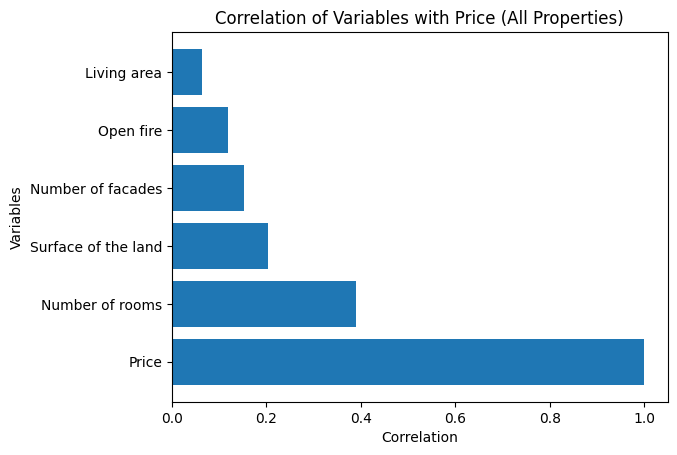

In [55]:
plt.barh(correlation_encoded.index, correlation_encoded.values)
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Correlation of Variables with Price (All Properties)')
plt.show()

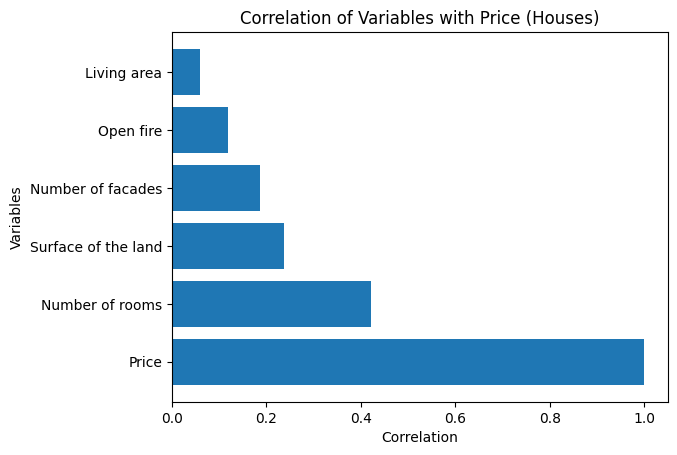

In [56]:
plt.barh(correlation_houses.index, correlation_houses.values)
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Correlation of Variables with Price (Houses)')
plt.show()

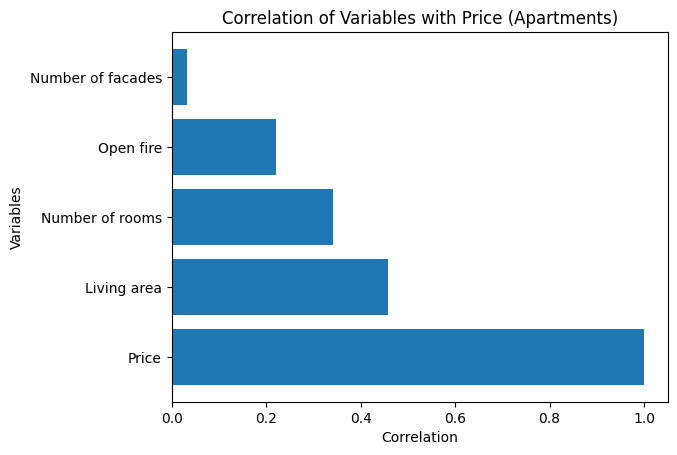

In [57]:
plt.barh(correlation_apartments.index, correlation_apartments.values)
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Correlation of Variables with Price (Apartments)')
plt.show()

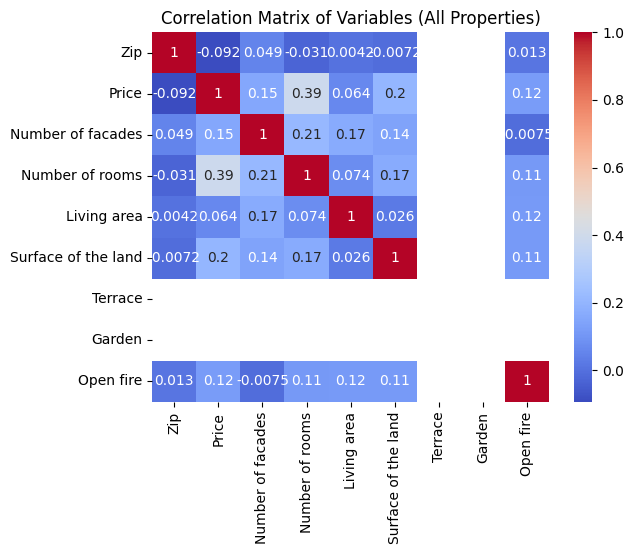

In [58]:
df_encoded_numeric = df_encoded.select_dtypes(include=[np.number]).drop('id', axis=1)
corr_matrix = df_encoded_numeric.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables (All Properties)')
plt.show()

